<a href="https://colab.research.google.com/github/aydawudu/Transformers_Practice/blob/main/Nueral_Machine_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#!pip install transformers sentencepiece transformers[sentencepiece]

In [2]:
#get the dataset for english to spanish text
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2022-10-26 19:05:38--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 64.233.191.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  --.-KB/s    in 0.01s   

2022-10-26 19:05:38 (182 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [3]:
!unzip -nq spa-eng.zip

In [4]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [5]:
#compile eng-spa translations
eng2spa={}
for line in open('spa-eng/spa.txt'):
  line=line.rstrip()
  eng, spa=line.split("\t")
  if eng not in eng2spa:
    eng2spa[eng]=[]
  eng2spa[eng].append(spa)

In [6]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [7]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')  #this removes punctuations

In [9]:
#lets test our tokenizer
tokens=tokenizer.tokenize('¿Qué me cuentas?'.lower())
sentence_bleu([tokens], tokens)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [10]:
sentence_bleu([['hi']],['hi'])

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [11]:
#Apply a smoother function
smoother=SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

0.2213885886251307

In [12]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

1.491668146240062e-154

In [13]:
sentence_bleu(['hi there friend'.split()], 'hi there friend'.split())

1.2213386697554703e-77

In [14]:
sentence_bleu([[1,2,3,4]],[1,2,3,4])

1.0

In [15]:
#let tokenize our translation
eng2spa_tokens={}
for eng, spa_list in eng2spa.items():
  spa_list_tokens=[]
  for text in spa_list:
    tokens =tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng] =spa_list_tokens

In [16]:
#let's import and instantiate our pipeline
from transformers import pipeline
translator =pipeline("translation", 
                     model='Helsinki-NLP/opus-mt-en-es', device=0)

Downloading:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/312M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/826k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [17]:
#test our translator
translator("I like bread and eggs")

[{'translation_text': 'Me gusta el pan y los huevos.'}]

In [18]:
#let check the number of samples
eng_phrases=list(eng2spa.keys())
len(eng_phrases)

102904

In [19]:
#lets get a subset
eng_phrases_subset=eng_phrases[100:200]

In [20]:
#let's translate the english subset
translations=translator(eng_phrases_subset)

In [22]:
#let check it out
translations[0]

{'translation_text': 'Me gustan las canciones populares.'}

In [23]:
#compute the bleu score for each of the subset translations
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
  matches=eng2spa_tokens[eng]

  #tokenize translation
  spa_pred=tokenizer.tokenize(pred['translation_text'].lower())

  score=sentence_bleu(matches, spa_pred)
  scores.append(score)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

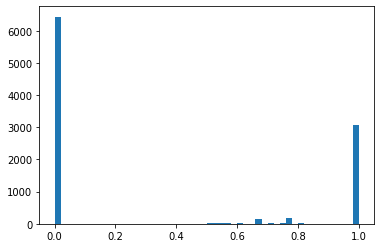

In [24]:
#plot an histogram of our scores to see how they are distributed
import matplotlib.pyplot as plt
plt.hist(scores, bins=50);

In [25]:
#let't compute the average score
import numpy as np
np.mean(scores)

0.34146772438141404

In [28]:
#create a function that print some samples
np.random.seed(1)

def print_random_translation():
  i=np.random.choice(len(eng_phrases_subset))
  eng=eng_phrases_subset[i]
  print("EN:", eng)
  
  translation=translations[i]['translation_text']
  print("ES Translations:", translation)

  matches=eng2spa[eng]
  print("Matches:", matches)

In [29]:
print_random_translation()

EN: I'm feeling great.
ES Translations: Me siento genial.
Matches: ['Me siento genial.']


In [30]:
print_random_translation()

EN: I believe in ghosts.
ES Translations: Creo en los fantasmas.
Matches: ['Yo creo en los fantasmas.', 'Yo creo que los fantasmas existen.']
